Following:
https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [24]:
string1 = "a hello world"
string2 = "helloo"
string1.find(string2)

-1

In [36]:
import pandas as pd

In [115]:
filename = '2020-06-23_000008_GDSystem.log'
filename = 'temp.log'
filename = 'tempfile30.txt'

#file = open(filename, mode = 'r', encoding = 'utf-8-sig')
#file = open(filename, mode = 'r', encoding = 'latin-1')
#file = open(filename, mode = 'r', encoding = 'utf-8')
file = open(filename, mode = 'r', encoding = 'utf-16')
#errors='ignore')

lines = file.readlines()
file.close()

list_imager = []

substring1 = 'Updated Cassette ID:'

count = 0
count_no = 0
count_yes = 0
for line in lines:
    count += 1

    if (line.find(substring1) >= 0):
        count_yes += 1

        line_split = line.split()
        if line_split[-1] == 'IMAGER':
            list_imager.append(line_split[1])

    else:
        #print("no")
        count_no += 1

print(count_no)
print(count_yes)
print(count)
print(type(list_imager))
print(list_imager[0])

290
2639
2929
<class 'list'>
08:08:27.503


In [116]:
import numpy as np
from astropy.time import Time
times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']
t = Time(list_imager, format='isot', scale='utc')
t

ModuleNotFoundError: No module named 'astropy'

In [107]:
df = pd.DataFrame(
    columns=['imager1', 'imager2'],
    data=zip(pd.to_numeric(pd.to_datetime(list_imager)),
             pd.to_numeric(pd.to_datetime(list_imager))))

#df = pd.DataFrame(
#    columns=['imager1', 'imager2'],
#    data=zip(pd.to_numeric(list_imager),
#             pd.to_numeric(list_imager)))

#df = pd.DataFrame(
#    columns=['imager1', 'imager2'],
#    data=zip(pd.to_datetime(list_imager),
#             pd.to_datetime(list_imager)))

#(list(zip(lst, lst2)), 
 
#df = pd.DataFrame(pd.to_datetime(list_imager))
#ser = pd.Series(pd.to_datetime(list_imager))

In [108]:
df.dtypes

imager1    int64
imager2    int64
dtype: object

In [109]:
df.head()

,imager1,imager2
0,1594195707503000000,1594195707503000000
1,1594195723945000000,1594195723945000000
2,1594234939750000000,1594234939750000000
3,1594234959780000000,1594234959780000000
4,1594235084034000000,1594235084034000000


In [110]:
df.describe()

,imager1,imager2
count,1.900000e+02,1.900000e+02
mean,1.594242e+18,1.594242e+18
std,7.257308e+12,7.257308e+12
min,1.594196e+18,1.594196e+18
25%,1.594238e+18,1.594238e+18
50%,1.594242e+18,1.594242e+18
75%,1.594245e+18,1.594245e+18
max,1.594253e+18,1.594253e+18


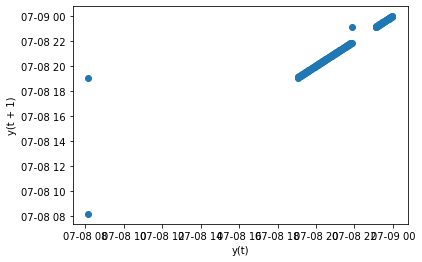

In [111]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(ser)
pyplot.show()

In [112]:
df

,imager1,imager2
0,1594195707503000000,1594195707503000000
1,1594195723945000000,1594195723945000000
2,1594234939750000000,1594234939750000000
3,1594234959780000000,1594234959780000000
4,1594235084034000000,1594235084034000000
...,...,...
185,1594252430841000000,1594252430841000000
186,1594252555719000000,1594252555719000000
187,1594252575484000000,1594252575484000000
188,1594252700004000000,1594252700004000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdff8081c88>,
      dtype=object)

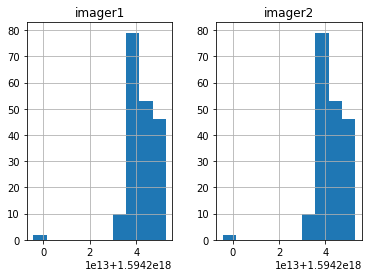

In [113]:
df.hist()

<BarContainer object of 10 artists>

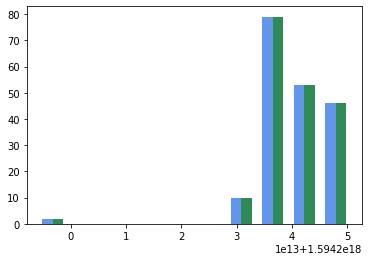

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
#import seaborn
#seaborn.set(style='ticks')

fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df['imager1'])
b_heights, b_bins = np.histogram(df['imager2'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')
